# MIT 6.867 Final Project: Data Exploration
Irina Degtiar



In [11]:
##########################################################################################################
### Set up workspace
##########################################################################################################
# Ensure re-load of all code
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import libraries - general
import numpy as np
import pylab as pl
import pandas as pd
import random
import sklearn.metrics

# Import libraries - plotting
import seaborn as sns
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
##########################################################################################################
### Define functions
##########################################################################################################


In [6]:
##########################################################################################################
### Load data
##########################################################################################################
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [10]:
##########################################################################################################
### Examine data
##########################################################################################################
train[0:10]


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


TO DO: Indicators need to be created for the categorical variables

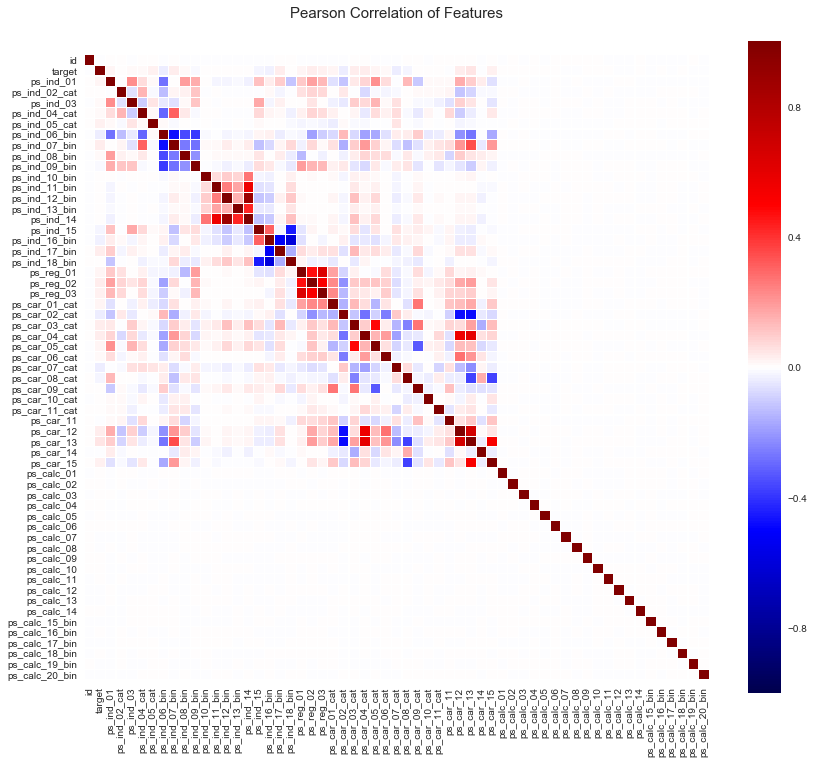

In [20]:
##########################################################################################################
### Pearson Correlation Heatmap
##########################################################################################################
# Calculate correlation
corr = train.astype(float).corr()

# Plot
colormap = plt.cm.seismic
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)

In [29]:
# Largest correlations
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, dfcorrelation_matrix, n=5):
    au_corr = dfcorrelation_matrix.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train, corr, 10))


Top Absolute Correlations
ps_ind_12_bin  ps_ind_14        0.890127
ps_car_12      ps_car_13        0.671720
ps_reg_01      ps_reg_03        0.637035
ps_car_04_cat  ps_car_13        0.595173
ps_ind_16_bin  ps_ind_18_bin    0.594265
ps_car_04_cat  ps_car_12        0.570028
ps_ind_11_bin  ps_ind_14        0.564903
ps_car_13      ps_car_15        0.529519
ps_ind_16_bin  ps_ind_17_bin    0.518076
ps_reg_02      ps_reg_03        0.516457
dtype: float64


No one feature is strongly correlated with the target. Between features, there exists some strong linear correlations; particularly between ps_ind_12_bin and ps_ind_14 (89%); other features have absolute correlations below 70%. Variables ps_calc_01 through ps_calc_20_bin appear to have no correlation with the target or other variables - these should be potentially removed from the analysis.

C:\Users\Irina\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Irina\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


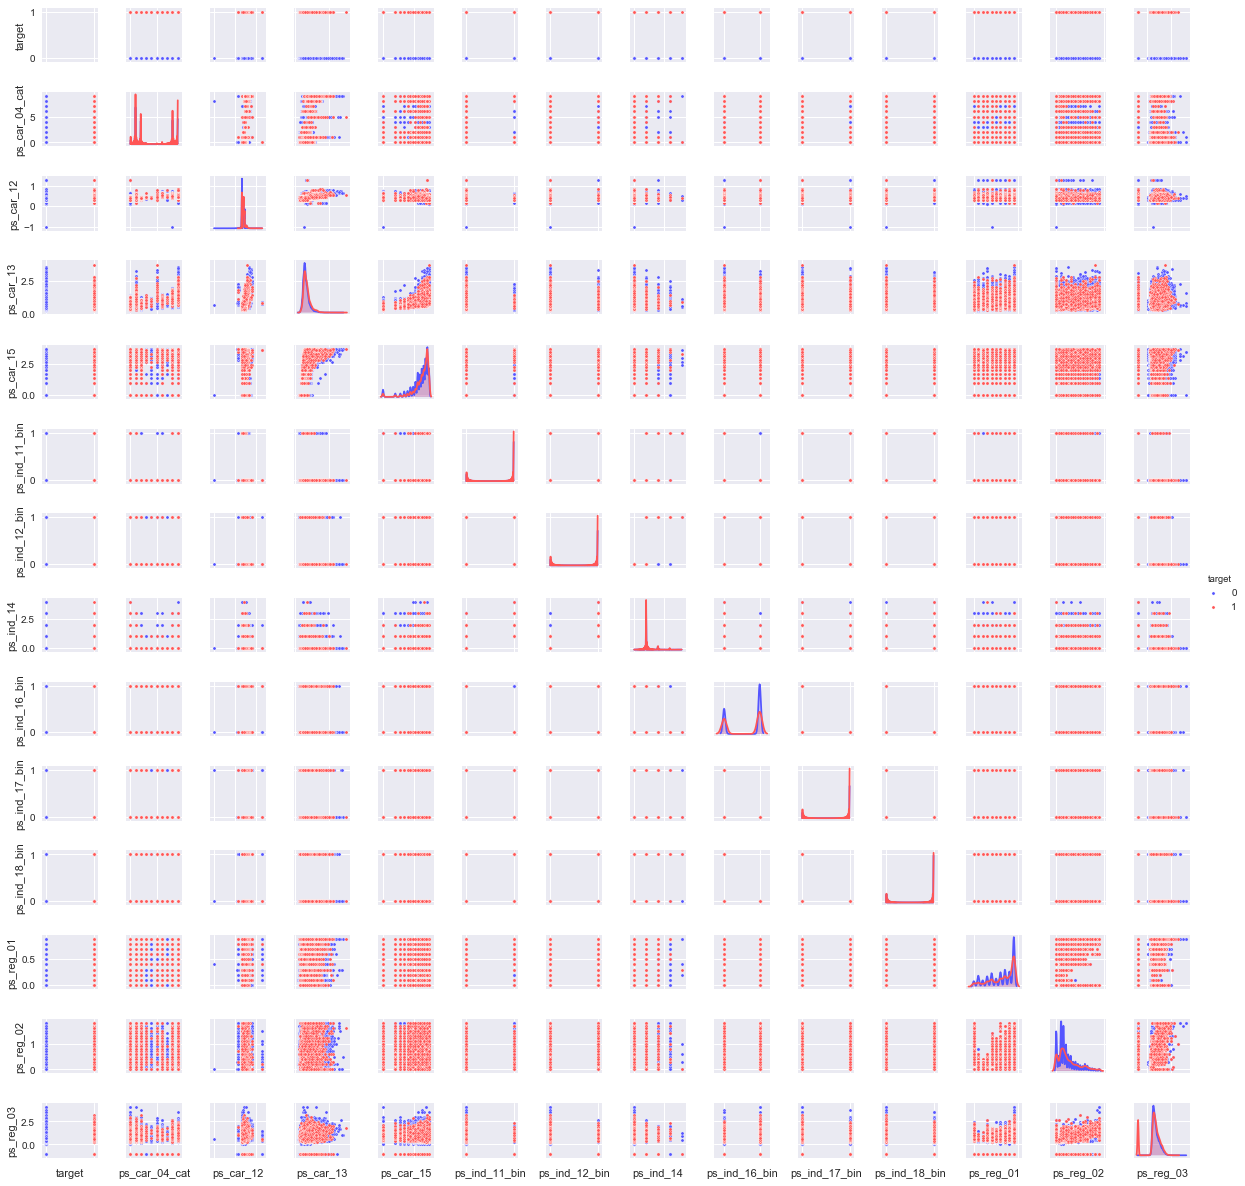

In [33]:
##########################################################################################################
### Pairwise distributions
##########################################################################################################
### Correlated variables
plot_pairwise = sns.pairplot(train[[u'target', u'ps_car_04_cat', u'ps_car_12', u'ps_car_13', u'ps_car_15', u'ps_ind_11_bin', \
       u'ps_ind_12_bin', u'ps_ind_14', u'ps_ind_16_bin', u'ps_ind_17_bin', u'ps_ind_18_bin', u'ps_reg_01', \
       u'ps_reg_02', u'ps_reg_03']], hue='target', palette = 'seismic', size=1.2, diag_kind = 'kde', \
       diag_kws=dict(shade=True),plot_kws=dict(s=10) )
plot_pairwise.set(xticklabels=[])



Some features appear to have a meaningful interaction that generates seperability of the target values, e.g., ps_car_15 and ps_car_13, ps_reg_03 and ps_car_13
TO DO: create interaction terms.

In [ ]:
##########################################################################################################
### Missing data
##########################################################################################################
